In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.00370665],
       [2.82435983]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1 )), X_new]  # add X0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.00370665],
       [9.65242631]])

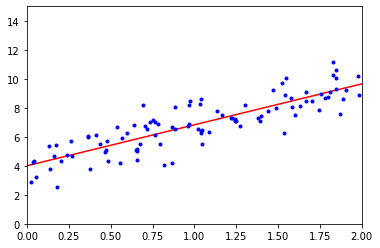

In [5]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.00370665]), array([[2.82435983]]))

In [7]:
lin_reg.predict(X_new)

array([[4.00370665],
       [9.65242631]])

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.00370665],
       [2.82435983]])

In [9]:
np.linalg.pinv(X_b).dot(y)

array([[4.00370665],
       [2.82435983]])

In [10]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[4.00370665],
       [2.82435983]])

In [11]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index+1]
        yi = y[random_index: random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
theta

array([[3.97780071],
       [2.89632193]])

In [12]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.97169333]), array([2.80824618]))

In [13]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.2547103])

In [15]:
X_poly[0]

array([1.2547103 , 1.57429795])

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.92419105]), array([[0.9974925, 0.5168304]]))

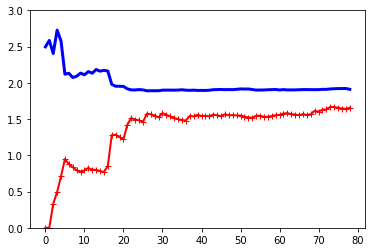

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    axes = plt.gca()
    axes.set_ylim([0, 3])
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

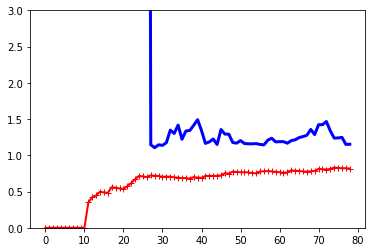

In [18]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

In [19]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.74568927]])

In [20]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.7225709])

In [21]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.69513748])

In [22]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.70001439])

In [23]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# prepare the data
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                      penalty=None, learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
        
print(best_epoch)

989


In [24]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [25]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

In [26]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="lbfgs")
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

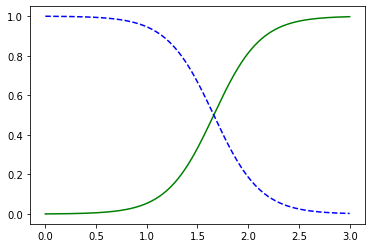

In [27]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

In [28]:
X = iris["data"][:, (2, 3)]  # petal length and width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs",
                                C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
softmax_reg.predict([[5, 2]])

array([2])

In [30]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

## Exercises

### 1. What Linear Regression training algorithm can you use if you have a training set with millions of features?

If you have a training set with a large number of features, you want to prefer a gradient descent algorithm, like plain Batch Gradient Descent or Stochastic Gradient Descent. Gradient descent algorithms' runtimes scale linearly with the number of features for computing the gradients whereas the normal equation and the Singular Value Decomposition require costly matrix operations in Omega(n^2).

### 2. Suppose the features in your training set have very different scales. What algorithms might suffer from this, and how? What can you do about it?

All gradient descent algorithms suffer, if the features are not properly scaled. The reason is that the algorithm always converges along the gradient, which might not be the direct way to the minimum, if the features don't have the same variance. A solution is to properly scale the features, for example with Scikit-Learn's StandardScaler.

### 3. Can Gradient Descent get stuck in a local minimum when training a Logistic Regression model?

No, because the cost function of Logistic Regression is convex. This means that the gradient always points towards the single global minimum, which will be found by the gradient descent algorithm.

### 4. Do all Gradient Descent algorithms lead to the same model provided you let them run long enough?

No, due to the random nature of Stochastic Gradient Descent and Mini-Batch Gradient Descent. Batch GD always converges towards a minimum, but if the cost function is not convex, it can be a local, non optimum minimum. However, if we are lucky Stochastic GD and Mini-Batch GD might select training instances or subsets that cause them to "jump" above the non optimal minimum and move further towards an optimal one. 
Also, these two algorithms never truly converge, but tend to move around a minimum. The intensity and direction of this noise depend on the data and the learning rate, where a large learning rate implies larger movements.

### 5. Suppose you use Batch Gradient Descent and you plot the validation error every epoch. If you notice that the validation error consistently goes up, what is likely going on? How can you fix this?

If the validation error consistently goes up, whereas the algorithm still converges along the gradient towards a minimum, the problem might be high variance caused by a difference in data used for training and validation. This causes your algorithm to overfit the training data. There are two strategies most commonly used to tackle this issue:
1. Collect more training data to ensure that the training and validation sets are more similar.
2. Add a regularization term to your cost function. This ensures (if the hyper parameters are properly selected) that you don't end up with a model much more complex than your data. The most known regularisations for Linear Regression are Ridge Regression with a squared regression term and Lasso Regression with a linear one.

### 6. Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?

No, because this might just be bad luck, because of Mini-Batches that don't represent the validation set. The validation error might still decrease, if we wait more iterations in which more preferable batches might be chosen randomly.

### 7. Which Gradient Descent algorithm (among those we discussed) will reach the vicinity of the optimal solution the fastest? Which will actually converge? How can you make the others converge as well?

Training a full Batch GD takes a lot of time on larger data sets. Therefore Stochastic GD and Mini-Batch GD are typically a lot faster. I would expect Mini-Batch GD to be the fastest on average depending on the batch size. Computing the gradient over a batch of instances instead of a single one yields a higher chance of actually being closer to the real gradient thus reducing the number of iterations needed.

Typically only Batch GD converges and Stochastic and Mini-Batch GD don't, because of the randomly chosen data to compute the gradient. However, if we carefully choose a learning schedule with a decreasing learning rate, these algorithms can converge as well.

### 8. Suppose you are using Polynomial Regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?

The large error between training and validation error is likely caused by overfitting the training data. Choosing a high number of degrees might result in a model which is more complex than the underlying data distribution. The algorithm usually uses all possible degrees to minimize the cost function without regularization. Common strategies are as follows:
1. Collect more training data. If the gaps between all data points get smaller, it gets more difficult for the learned function to move a lot in the gaps, which usually results in a more realistic function for the given training data. However, due to the curse of dimensionality this is often difficult.
2. Add a regularization term, such as l1 or l2 regularization (see question 5 above).

### 9. Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter α or reduce it?

Since both training and validation error are fairly high and almost equal, we probably have low variance and a lot of bias due to an underfitting model. To reduce the bias, we have to regularize less by reducing alpha.

### 10. Why would you want to use:
* Ridge Regression instead of plain Linear Regression (i.e., without any regularization)?

We want to use a regularized model like Ridge Regression to prevent overfitting and reduce the variance. Models without regularization tend to overfit the data and have a large variance but lower bias.

* Lasso instead of Ridge Regression?

Lasso tends to result in sparse models with parameters which are actually 0, whereas Ridge Regression would set these to very small values close but not equal to 0 and returns a sparse model. This is advantageuous, when we believe a training set's distribution to be actually different than the one we are training, for example a polynomial model of degree 4 trained on quadratic data. Lasso would probably set the first two coefficients of the polynom to 0.

* Elastic Net instead of Lasso?

Elastic Net can combine the advantages of Lasso and Ridge Regression by using a combination of l1 and l2 regularization. Lasso often results in sparse models and completely eliminates useless coefficients. On the other hand, Ridge Regression behaves less erattically, when we have more parameters than training instances or if we have a strong correlation between different features.


### 11.  Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime. Should you implement two Logistic Regression classifiers or one Softmax Regression classifier?

Softmax only supports multiclass but not multilabel outputs. This means it is usually not possible to predict whether is is night or day and outdoor or indoor at the same time. Therefore two Logistic Regression classifiers seem to be better for this usecase. However, it might be possible to modify the labels to mutually exclusive classes such as "outdoor daytime" or "indoor daytime" and classify them with a Softmax Regression classifier. This probably results in faster training because we only have one classifier, but the results may be worse.


### 12.  Implement Batch Gradient Descent with early stopping for Softmax Regression (without using Scikit-Learn).


In [184]:
# to save time we will use Scikit-Learn's utility functions and not implement them
# ourselves. Only the Softmax Regression is implemented by hand.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

test_size = 0.2

X = iris["data"]
y = iris["target"]

# add bias for every data instance
X_bias = np.c_[np.ones([len(X), 1]), X]

# split data into training, validation and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
val_size = test_size / (1 - test_size)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, random_state=1)

enc = LabelBinarizer()
enc.fit(y_train)
y_train = enc.transform(y_train)

In [185]:
def softmax(log_odds):
    """
    Returns the probabilities to belong to certain classes as arrays
    for given log-odd scores.
    """
    exps = np.exp(log_odds)
    sum_exps = np.sum(exps, axis=1, keepdims=True)
    return exps / sum_exps

In [186]:
learning_rate = 0.1
n_iterations = 5000
n, n_features = X_train.shape
n_labels = len(np.unique(y))
eps = 1e-6  # prevent log(0)

# initialize parameters with random values - model will converge,
# because it is convex
Theta = np.random.randn(n_features, n_labels)

for iteration in range(n_iterations):
    log_odds = X_train.dot(Theta)
    probs = softmax(log_odds)
    loss = -np.mean(np.sum(y_train * np.log(probs + eps), axis=1))
    if iteration % 200 == 0:
        print("Iteration: {0} - Loss: {1}".format(iteration, loss))
    gradients = 1/n * X_train.T.dot((probs - y_train))
    Theta -= learning_rate * gradients

Iteration: 0 - Loss: 3.90124039393522
Iteration: 200 - Loss: 0.2910190737857741
Iteration: 400 - Loss: 0.21110874566545657
Iteration: 600 - Loss: 0.17363959453869204
Iteration: 800 - Loss: 0.15182143054705172
Iteration: 1000 - Loss: 0.1374876706828262
Iteration: 1200 - Loss: 0.12731482537516006
Iteration: 1400 - Loss: 0.11969709925346465
Iteration: 1600 - Loss: 0.11376346189392324
Iteration: 1800 - Loss: 0.10900020907490231
Iteration: 2000 - Loss: 0.1050845226228631
Iteration: 2200 - Loss: 0.10180316821182846
Iteration: 2400 - Loss: 0.0990095139652625
Iteration: 2600 - Loss: 0.09659932822841044
Iteration: 2800 - Loss: 0.09449643014109803
Iteration: 3000 - Loss: 0.09264380794981861
Iteration: 3200 - Loss: 0.09099791759547358
Iteration: 3400 - Loss: 0.08952490652469786
Iteration: 3600 - Loss: 0.08819804379375712
Iteration: 3800 - Loss: 0.0869959290110867
Iteration: 4000 - Loss: 0.08590121756407537
Iteration: 4200 - Loss: 0.08489969617161137
Iteration: 4400 - Loss: 0.08397960115614278
Ite

In [187]:
Theta

array([[ 1.70909626,  1.29468714, -2.24838549],
       [ 2.9400199 , -0.03744131, -4.03587626],
       [-3.97780163,  0.08041022,  4.73528374],
       [-2.96513537, -3.10906614,  3.47589563]])

In [188]:
from sklearn.metrics import accuracy_score

log_odds = X_val.dot(Theta)
y_probs = softmax(log_odds)
y_preds = np.argmax(y_probs, axis=1)
print(accuracy_score(y_preds, y_val))

0.9333333333333333


In [196]:
learning_rate = 0.05
n_iterations = 5000
alpha = 0.1  # for l2 regularization

# initialize parameters with random values - model will converge,
# because it is convex
Theta = np.random.randn(n_features, n_labels)
best_loss = float("inf")
best_model = None
best_iteration = None

for iteration in range(n_iterations):
    log_odds = X_train.dot(Theta)
    probs = softmax(log_odds)
    cross_entr_loss = -np.mean(np.sum(y_train * np.log(probs + eps), axis=1))
    l2_loss = 0.5 * np.sum(np.square(Theta[:1]))
    loss = cross_entr_loss + alpha * l2_loss
    if iteration % 200 == 0:
        print("Iteration: {0} - Loss: {1}".format(iteration, loss))
    if loss < best_loss:
        gradients = 1/n * X_train.T.dot((probs - y_train)) + np.r_[np.zeros([1, n_labels]), alpha * Theta[1:]]
        Theta -= learning_rate * gradients
        best_loss = loss
        best_model = Theta
        best_epoch = iteration
    else:
        print("Iteration: {0} - Loss: {1} - best model found!".format(iteration, loss))
        break
    

Iteration: 0 - Loss: 2.295350190136736
Iteration: 200 - Loss: 0.5083062074472232
Iteration: 400 - Loss: 0.4629842144881138
Iteration: 600 - Loss: 0.4575326514683741
Iteration: 686 - Loss: 0.45733128146966007 - best model found!


In [197]:
log_odds = X_val.dot(best_model)
y_probs = softmax(log_odds)
y_preds = np.argmax(y_probs, axis=1)
print(accuracy_score(y_preds, y_val))

0.9333333333333333


Plotting the predictions is unfortunately not possible, because I decided to use all three available features.

In [191]:
log_odds = X_test.dot(best_model)
y_probs = softmax(log_odds)
y_preds = np.argmax(y_probs, axis=1)
print(accuracy_score(y_preds, y_test))

0.7666666666666667
